In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier #clasification tree
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
df = pd.read_csv('data_banknote_authentication.zip',names = ['Variance','Skewness','Kurtosis','Entropy','class'])

In [6]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [49]:
df.shape

(1372, 5)

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Kurtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


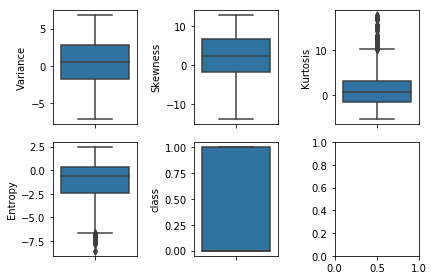

In [7]:
n_columns = 3
n_rows = 2
f,ax = plt.subplots(n_rows,n_columns,figsize = (2*n_columns,2*n_rows))
for i , c in enumerate(df.columns):
    sns.boxplot(y = c,data = df,ax = ax[i//n_columns, i%n_columns])
plt.tight_layout()
plt.show()

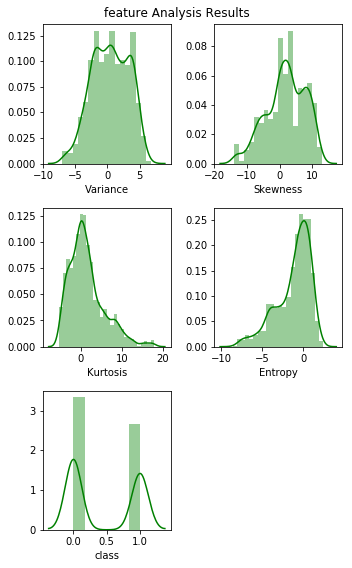

In [23]:
fig = plt.figure(figsize = (5, 8))
j = 0
for i in df:
    plt.subplot(3, 2, j+1)
    j += 1
    sns.distplot(df[i], color='g', label = 'malignant')
fig.suptitle('feature Analysis Results')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [6]:
df.isnull().sum()

Variance    0
Skewness    0
Kurtosis    0
Entropy     0
class       0
dtype: int64

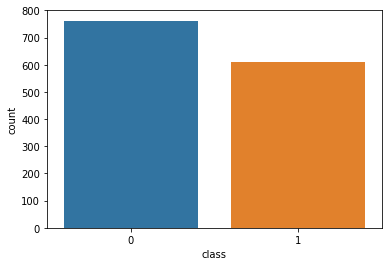

In [47]:
sns.countplot(df['class'])

In [9]:

#We are all set to split the data into train and test
X = df.drop('class', axis = 1)
X.head()
y = df["class"]




In [10]:
from sklearn.preprocessing import scale
X = scale(X)

In [11]:
#Lets use train_test_split to split X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(960, 4) (412, 4) (960,) (412,)


## Logistic Regression

In [12]:
log_reg = LogisticRegression()


In [13]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
import innomatics

In [15]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)

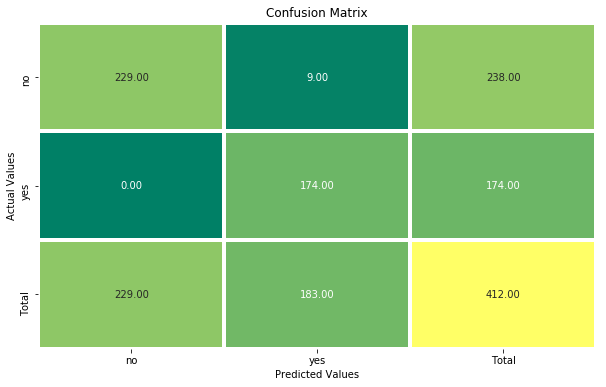

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       238
           1       0.95      1.00      0.97       174

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412


************************************Kappa Score************************************


Kappa Score = 0.9555395683453237

******************************Area Under Curve Score******************************


AUC Score = 0.98109243697479
Number of probabilities to build ROC = 15


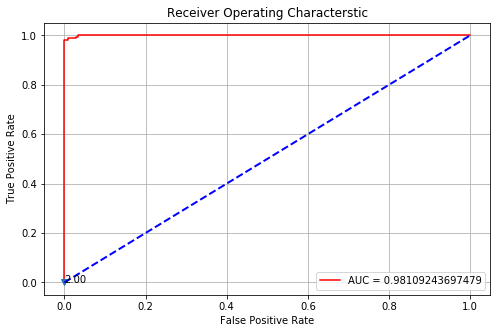

In [16]:
innomatics.classification_metric(y_test,y_pred,y_prob[:,1],n=50,
                                label = ['no','yes'], verbose = True)

## Model for Naivy_Base

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
NavBas = GaussianNB()


In [36]:
model_NB = NavBas.fit(X_train,y_train)

In [37]:
y_prob = model_NB.predict_proba(X_test)
y_pred = model_NB.predict(X_test)

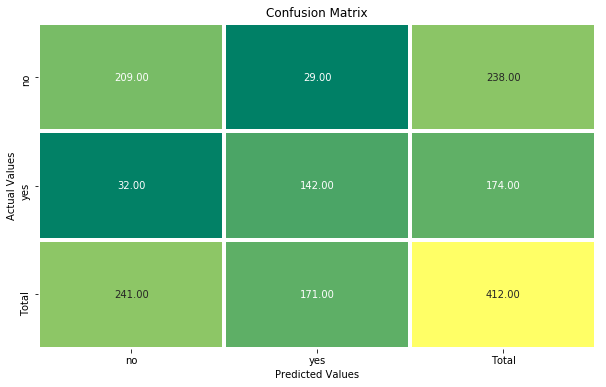

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.87      0.88      0.87       238
           1       0.83      0.82      0.82       174

    accuracy                           0.85       412
   macro avg       0.85      0.85      0.85       412
weighted avg       0.85      0.85      0.85       412


************************************Kappa Score************************************


Kappa Score = 0.6958563268467421

******************************Area Under Curve Score******************************


AUC Score = 0.8471216072635951
Number of probabilities to build ROC = 80


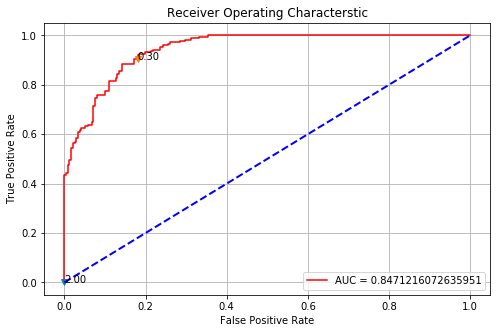

In [38]:
innomatics.classification_metric(y_test,y_pred,y_prob[:,1],n=50,
                                label = ['no','yes'], verbose = True)

In [39]:
import scikitplot as skplt


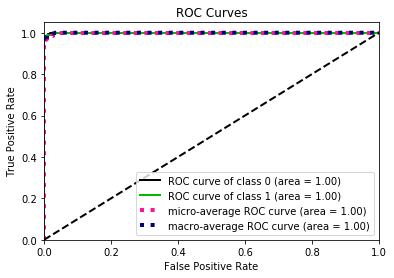

In [40]:
skplt.metrics.plot_roc(y_test,log_reg.predict_proba(X_test))
plt.show()
